# Objectifs
- La mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. On va utilisere donc des méthodes non supervisées pour regrouper ensemble des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe marketing pour mieux communiquer.

- La segmentation proposée doit être exploitable et facile d’utilisation pour l’équipe marketing.
- On va évaluerer la fréquence à laquelle la segmentation doit être mise à jour, afin de pouvoir effectuer un devis de contrat de maintenance.
- Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

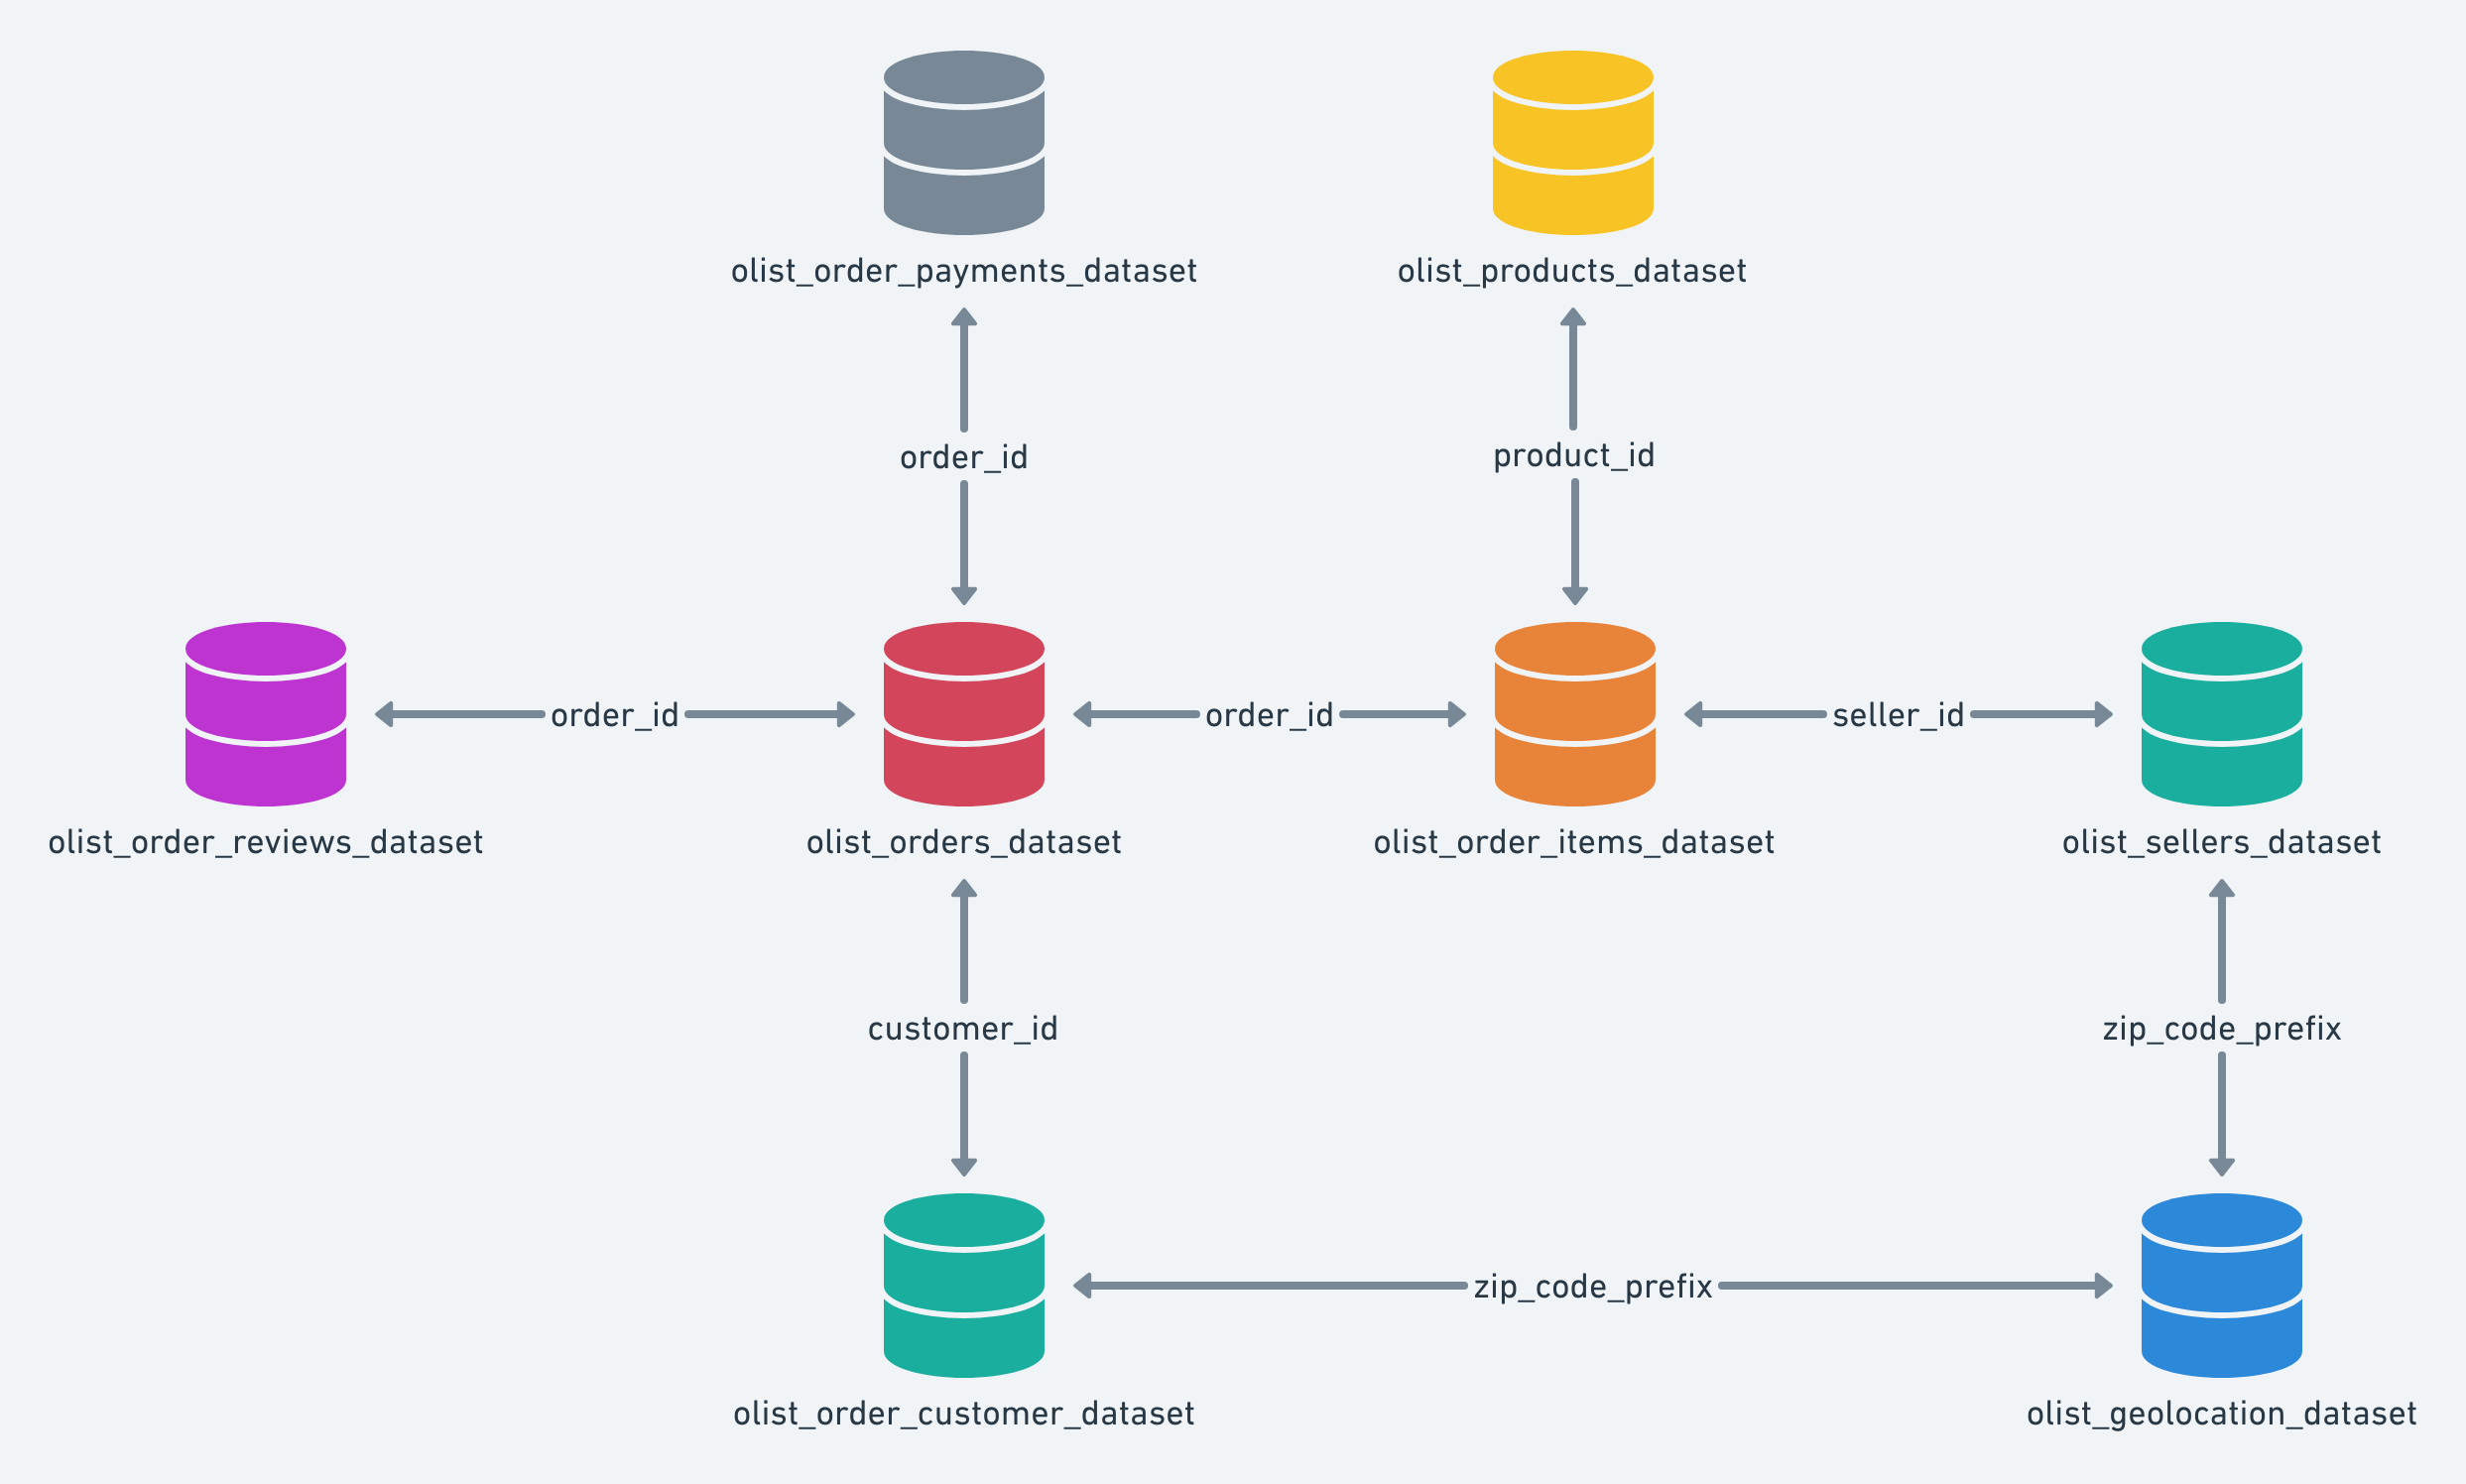

- Les données se réfèrent au commerce électronique sur le territoire brésilien entre 09/2016 et 10/2018. Les fichiers d'intérêt sont appelés (1) 'olist_order_reviews_dataset.csv', (2) 'olist_products_dataset.csv' et (3) 'olist_order_payments_dataset.csv' et contiennent des informations sur les avis, les bons de commande et les produits vendus dans le commerce électronique au Brésil en le même intervalle de temps.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import calendar
# Plotly library
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
#import colorlover as cl

# Modification des options d'affichage des colonnes
pd.set_option('display.max_colwidth', None)

# Modification des options d'affichage du dataset
pd.set_option('display.max_column', 100)

import warnings
warnings.filterwarnings("ignore")



In [2]:
# Load the datasets 
customers_dataset= pd.read_csv('olist_customers_dataset.csv')
geolocation_dataset= pd.read_csv('olist_geolocation_dataset.csv')
order_items_dataset= pd.read_csv('olist_order_items_dataset.csv')
order_payments_dataset= pd.read_csv('olist_order_payments_dataset.csv')
order_reviews_dataset= pd.read_csv('olist_order_reviews_dataset.csv')
orders_dataset= pd.read_csv('olist_orders_dataset.csv')
products_dataset= pd.read_csv('olist_products_dataset.csv')
sellers_dataset= pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation= pd.read_csv('product_category_name_translation.csv')


# Customers_dataset: 
- Cet ensemble de données contient des informations sur le client et son emplacement. Utilisez-le pour identifier les clients uniques dans l'ensemble de données des commandes et pour trouver le lieu de livraison des commandes.
- Dans notre système, chaque commande est attribuée à un identifiant client unique. Cela signifie que le même client obtiendra des identifiants différents pour différentes commandes. Le but d'avoir un customerunique_id sur l'ensemble de données est de vous permettre d'identifier les clients qui ont effectué des rachats en magasin. Sinon, vous constaterez que chaque commande est associée à un client différent.

In [5]:
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers_dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
# Nombre de ville 
number_of_cities= customers_dataset["customer_city"].nunique()
# Nombre d'etats 
number_of_states= customers_dataset["customer_state"].nunique()
# Nombre de consommateurs 
number_of_constomers= customers_dataset["customer_unique_id"].nunique()
print("Le nombre de villes est : {}".format(number_of_cities))
print("Le nombre d'états est : {}".format(number_of_states))
print("Le nombre de clients est : {}".format(number_of_constomers))

Le nombre de villes est : 4119
Le nombre d'états est : 27
Le nombre de clients est : 96096


In [8]:
geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


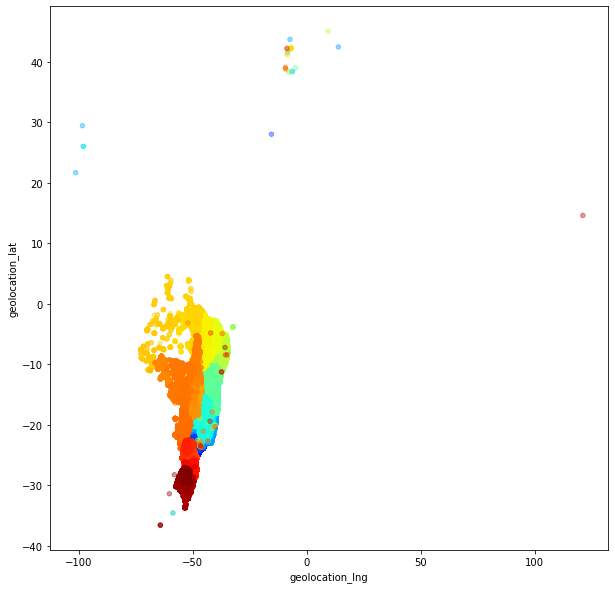

In [9]:
geolocation_dataset.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap=plt.get_cmap("jet"), colorbar=False, figsize=(10, 10))
plt.show()  

In [10]:
# Removing some outliers

# Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude
geolocation_dataset = geolocation_dataset[geolocation_dataset.geolocation_lat <= 5.27438888]
# it’s most Western spot is at 73 deg, 58′ 58.19″W Long
geolocation_dataset = geolocation_dataset[geolocation_dataset.geolocation_lng >= -73.98283055]
# It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude
geolocation_dataset = geolocation_dataset[geolocation_dataset.geolocation_lat >= -33.75116944]
# It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geolocation_dataset = geolocation_dataset[geolocation_dataset.geolocation_lng <= -34.79314722]

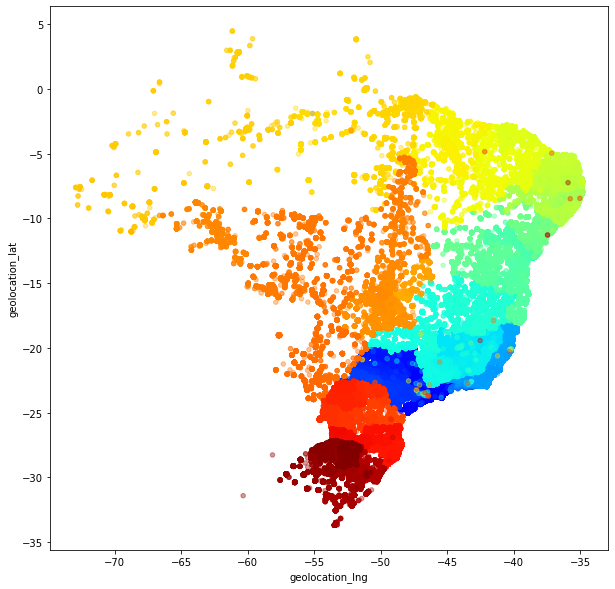

In [11]:
geolocation_dataset.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap=plt.get_cmap("jet"), colorbar=False, figsize=(10, 10))
plt.show()  

In [13]:
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [16]:
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [136]:
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [18]:
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [19]:
products_dataset.product_category_name.nunique()

73

In [20]:
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [139]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# Data Exploratoire:

In [69]:
import lux
data= [customers_dataset, geolocation_dataset, order_items_dataset, order_payments_dataset,
order_reviews_dataset, orders_dataset, products_dataset, sellers_dataset, product_category_name_translation]

titles=[" customers", "geolocation", "order_items", "order_payments", "order_reviews", "orders", "products", "sellers", "product_category_name"]

info_df=pd.DataFrame({},)
info_df['data']=titles
info_df['colums']= [','.join([col for col, null in df.isnull().sum().items()]) for df in data]
info_df['colums_nbr']= [df.shape[1] for df in data]
info_df['null_nbr']= [df.isnull().sum().sum() for df in data]
info_df['null_colums_nbr']=[ len([col for col, null in df.isnull().sum().items() if null >0]) for df in data]
info_df['null_colums'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in data]


info_df.style.background_gradient(cmap='coolwarm')

,data,colums,colums_nbr,null_nbr,null_colums_nbr,null_colums
0,customers,"customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state",5,0,0,
1,geolocation,"geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state",5,0,0,
2,order_items,"order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value",7,0,0,
3,order_payments,"order_id,payment_sequential,payment_type,payment_installments,payment_value",5,0,0,
4,order_reviews,"review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp",7,146532,2,"review_comment_title, review_comment_message"
5,orders,"order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date",8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,products,"product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,"seller_id,seller_zip_code_prefix,seller_city,seller_state",4,0,0,
8,product_category_name,"product_category_name,product_category_name_english",2,0,0,


# Fusionner l'ensemble des données

In [74]:
df= pd.merge(orders_dataset, order_payments_dataset, on="order_id")
df= df.merge(customers_dataset, on="customer_id")
df= df.merge(order_items_dataset, on="order_id")
df= df.merge(order_reviews_dataset, on="order_id")
df= df.merge(sellers_dataset, on="seller_id")
df= df.merge( products_dataset, on="product_id")
df= df.merge(product_category_name_translation, on="product_category_name")
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,116581.0,1.093369,0.727240,1.00,1.00,1.00,1.00,29.00
payment_installments,116581.0,2.949614,2.783798,0.00,1.00,2.00,4.00,24.00
payment_value,116581.0,172.910258,267.622516,0.00,61.00,108.19,189.72,13664.08
customer_zip_code_prefix,116581.0,35053.391556,29817.864821,1003.00,11310.00,24315.00,58600.00,99980.00
order_item_id,116581.0,1.196953,0.701350,1.00,1.00,1.00,1.00,21.00
price,116581.0,120.751369,183.848421,0.85,39.90,74.90,134.90,6735.00
freight_value,116581.0,20.062550,15.845515,0.00,13.08,16.32,21.22,409.68
review_score,116581.0,4.017507,1.397886,1.00,4.00,5.00,5.00,5.00
seller_zip_code_prefix,116581.0,24504.889030,27625.157426,1001.00,6429.00,13690.00,28495.00,99730.00
product_name_lenght,116581.0,48.766317,10.033728,5.00,42.00,52.00,57.00,76.00


In [25]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116581 non-null  object 
 1   customer_id                    116581 non-null  object 
 2   order_status                   116581 non-null  object 
 3   order_purchase_timestamp       116581 non-null  object 
 4   order_approved_at              116567 non-null  object 
 5   order_delivered_carrier_date   115368 non-null  object 
 6   order_delivered_customer_date  114066 non-null  object 
 7   order_estimated_delivery_date  116581 non-null  object 
 8   payment_sequential             116581 non-null  int64  
 9   payment_type                   116581 non-null  object 
 10  payment_installments           116581 non-null  int64  
 11  payment_value                  116581 non-null  float64
 12  customer_unique_id            

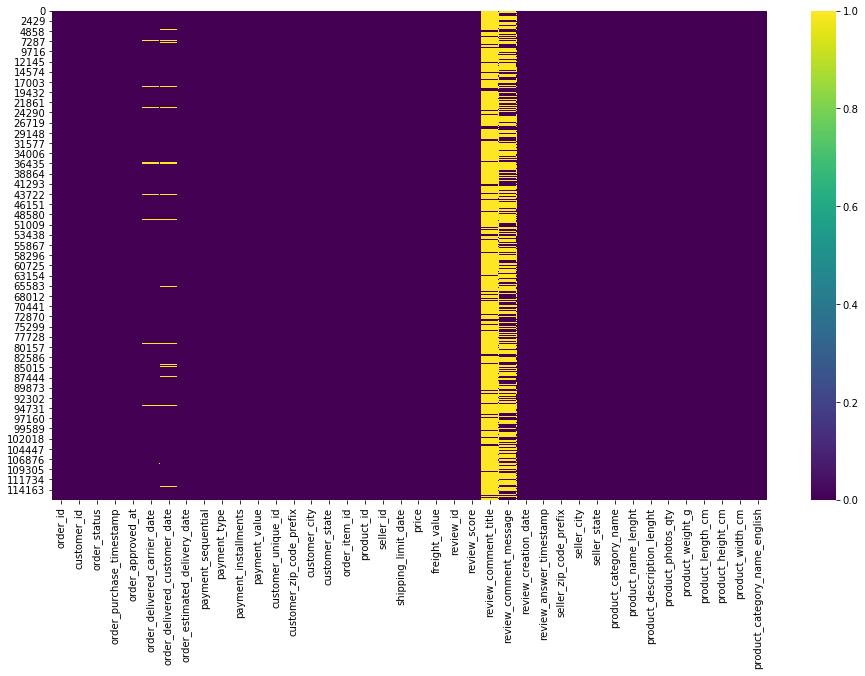

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isna(), cmap="viridis")
plt.show()

In [27]:
# suppression des colonnes avec plus de valeurs nan
df= df.drop(['review_comment_message', 'review_comment_title'], axis=1)

In [28]:
na= df.shape[0]
print('Dataset avant la supression des nan valeurs', na)
df.dropna(inplace=True)

print('Après la suppression des nan valeurs il reste {:0.1%} de la data '.format(df.shape[0]/na))

Dataset avant la supression des nan valeurs 116581
Après la suppression des nan valeurs il reste 97.8% de la data 


# convertir les types de données des colonnes de date en pd.datetime

In [29]:
#df[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date']]= df[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)

time_columns = ['order_purchase_timestamp','order_approved_at','order_estimated_delivery_date','order_delivered_customer_date', 'shipping_limit_date', 'review_creation_date','review_answer_timestamp']
for x in time_columns:
    df[x] = pd.to_datetime(df[x])
df.sample(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
5114,c1242e3f591a1f8ab11d51f2aedb1bb0,da0a466286c5f331008ff11925b8af24,delivered,2017-12-28 16:47:54,2017-12-28 16:56:23,2018-01-13 00:33:03,2018-02-20 17:58:58,2018-02-06,1,credit_card,10,107.78,d95330e1e04100ab8363d90639e2ae36,89120,timbo,SC,1,d76c9aa6123ceda9cd490fb2301c1cb4,0ed6ce5d87fd9c69eaacaeb778d67235,2018-01-10 16:56:23,89.90,17.88,32f0563104b6898a286dc46faf151a0a,3,2018-02-08,2018-02-08 06:22:27,13473,americana,SP,utilidades_domesticas,53.0,1278.0,1.0,2200.0,50.0,10.0,35.0,housewares
71879,bb45d77c66b6a32f77813252457545a5,0b10808638c701826d8c83ed1a123fb1,delivered,2018-03-15 14:19:11,2018-03-15 14:35:19,2018-03-16 17:03:00,2018-03-21 00:11:47,2018-03-27,1,credit_card,1,21.04,5202bcf04ca5047d3fd3ec7fe7bde7f2,4576,sao paulo,SP,1,f89d2b130b571d24532514dca6fee2a8,8b321bb669392f5163d04c59e235e066,2018-03-21 14:30:45,13.65,7.39,96b0f04a5fa962099dfc1f22a616e9f4,4,2018-03-22,2018-03-22 10:18:00,1212,sao paulo,SP,eletronicos,41.0,383.0,1.0,150.0,25.0,7.0,16.0,electronics


In [30]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114050 entries, 0 to 116580
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114050 non-null  object        
 1   customer_id                    114050 non-null  object        
 2   order_status                   114050 non-null  object        
 3   order_purchase_timestamp       114050 non-null  datetime64[ns]
 4   order_approved_at              114050 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114050 non-null  object        
 6   order_delivered_customer_date  114050 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114050 non-null  datetime64[ns]
 8   payment_sequential             114050 non-null  int64         
 9   payment_type                   114050 non-null  object        
 10  payment_installments           114050 non-null  int64         
 11  

In [32]:
def calc_timeDiff(start_date,end_date):
    #fmt = '%d/%m/%Y %H:%M'
    fmt = '%Y-%m-%d %H:%M:%S'
    end_date = pd.to_datetime(end_date,format=fmt).values.astype('datetime64[D]')

    start_date = pd.to_datetime(start_date,format=fmt).values.astype('datetime64[D]')            
    timediff = end_date - start_date

    timediff =pd.to_datetime(timediff)
    return (timediff.dt.hour * 60 + timediff.dt.minute + (timediff.dt.second/60)).astype(float)

#df['approved_delay'] = calc_timeDiff(df['order_approved_at'], df['order_purchase_timestamp'])


- Créez une colonne (approved_delay) de la commande pour voir combien de temps cela prendra entre le début de la commande et la réception des marchandises par le client

- Créez la colonne (delivery_gap_btw_est_act) pour voir si l'heure estimée est correcte ou s'il est trop tard Si la valeur est + positive, alors il arrive plus vite, si 0 alors il est à l'heure, mais si - négatif alors il est en retard

- Créez une colonne (review_answer_time) de temps de réponse pour savoir combien de temps il faudra pour remplir un avis après l'envoi d'une enquête de satisfaction client.

- Combinez la colonne product length_cm, product height cm et product width cm pour en faire un volume avec une nouvelle colonne, product_volume.

In [35]:
df['approved_delay'] = df['order_approved_at']-df['order_purchase_timestamp']
df['delivery_gap_btw_est_act'] = df['order_estimated_delivery_date']- df['order_delivered_customer_date']
df['review_answer_time'] = df['review_answer_timestamp'] - df['review_creation_date']
df['product_volume'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

In [44]:
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,approved_delay,delivery_gap_btw_est_act,review_answer_time,product_volume,approved_minutes,delivery_time,estimated_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,0 days 00:10:42,7 days 02:34:47,1 days 03:43:48,1976.0,642.0,8.429144,15.536632
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,0 days 00:10:42,7 days 02:34:47,1 days 03:43:48,1976.0,642.0,8.429144,15.536632
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,0 days 00:10:42,7 days 02:34:47,1 days 03:43:48,1976.0,642.0,8.429144,15.536632


In [47]:
### convert time delay between approving purchase into minutes data
#approved_minutes= df.approved_delay.iloc[].total_seconds()/60 
#approved_time = df['approved_delay'].apply(pd.to_datetime)
df['approved_minutes']=(df['order_approved_at']-df['order_purchase_timestamp']).dt.total_seconds()
#approved_minutes = approved_time.hour*60 + approved_time.minute


# Création variable delivery_time 
df['delivery_time'] = df['order_delivered_customer_date'] \
    - df['order_approved_at']
df['delivery_time'] = df['delivery_time'] \
    .dt.total_seconds() / 86400


# Création variable estimated_delivery_time 
df['estimated_delivery_time'] = df['order_estimated_delivery_date'] \
    - df['order_approved_at']
df['estimated_delivery_time'] = df['estimated_delivery_time'] \
    .dt.total_seconds() / 86400
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,approved_delay,delivery_gap_btw_est_act,review_answer_time,product_volume,approved_minutes,delivery_time,estimated_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,0 days 00:10:42,7 days 02:34:47,1 days 03:43:48,1976.0,642.0,8.429144,15.536632
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,0 days 00:10:42,7 days 02:34:47,1 days 03:43:48,1976.0,642.0,8.429144,15.536632
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,0 days 00:10:42,7 days 02:34:47,1 days 03:43:48,1976.0,642.0,8.429144,15.536632
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,b46f1e34512b0f4c74a72398b03ca788,4,2017-08-19,2017-08-20 15:16:36,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,0 days 01:35:45,9 days 09:15:17,1 days 15:16:36,1976.0,5745.0,2.777396,12.163009
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,dc90f19c2806f1abba9e72ad3c350073,5,2017-08-08,2017-08-08 23:26:23,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,0 days 00:18:28,7 days 05:29:59,0 days 23:26:23,1976.0,1108.0,4.990810,12.219965


In [154]:
#Deliver_gap = pd.DatetimeIndex(df['delivery_gap_btw_est_act'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114050 entries, 0 to 116580
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       114050 non-null  object         
 1   customer_id                    114050 non-null  object         
 2   order_status                   114050 non-null  object         
 3   order_purchase_timestamp       114050 non-null  datetime64[ns] 
 4   order_approved_at              114050 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   114050 non-null  object         
 6   order_delivered_customer_date  114050 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  114050 non-null  datetime64[ns] 
 8   payment_sequential             114050 non-null  int64          
 9   payment_type                   114050 non-null  object         
 10  payment_installments           114050 non-null  int64   

# suppression des lignes dupliqué:

In [30]:
df.duplicated().sum()

0

# Data Exploratoire: 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

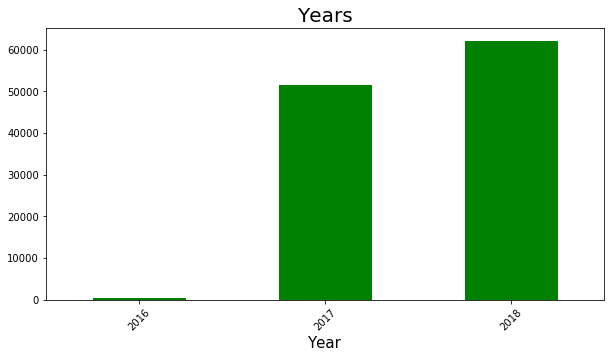

In [31]:
df['Year']= df['order_purchase_timestamp'].dt.year
df.groupby('Year').size().plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Years', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.xticks(rotation=45)

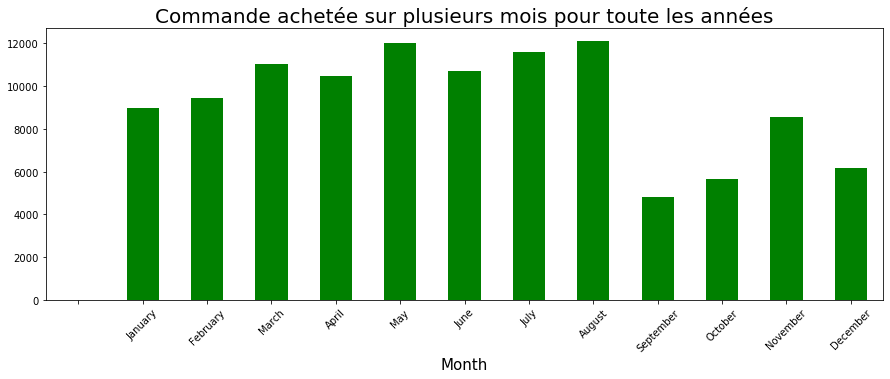

In [32]:
df['Month'] =  pd.Series(pd.Categorical(df['order_purchase_timestamp'].dt.month_name(), categories=list(calendar.month_name)))
df['Month']
df.groupby('Month').size().plot(kind = 'bar',figsize=(15,5), color = 'green' )
plt.title('Commande achetée sur plusieurs mois pour toute les années',fontsize=20);
plt.xlabel('Month',fontsize=15);
plt.xticks(rotation=45);

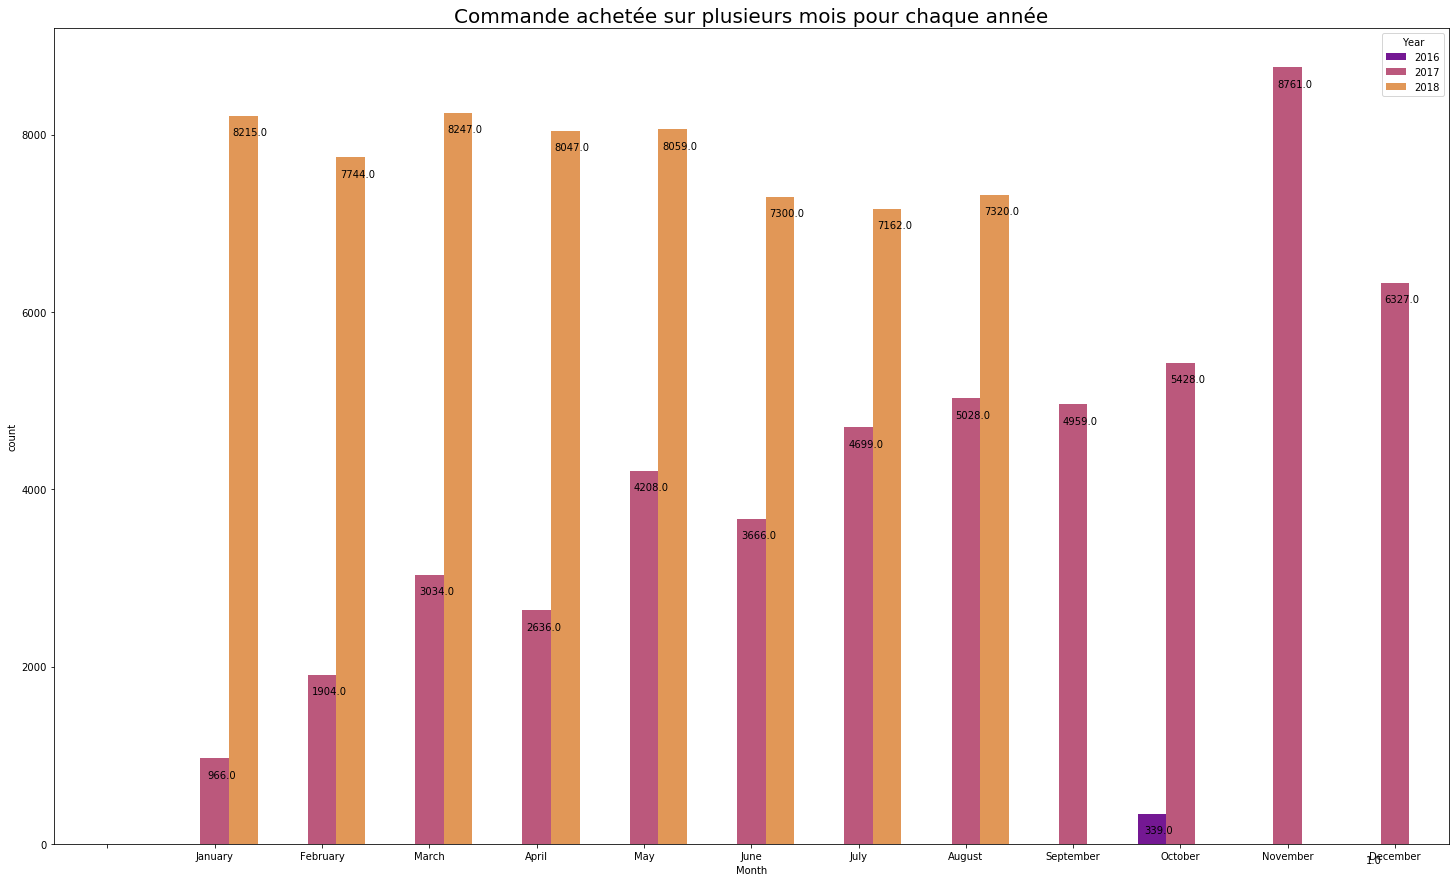

In [159]:
df['Month'] = df['order_purchase_timestamp'].dt.month_name()
ax= plt.figure(figsize=(25,15))
ax = sns.countplot(data=df,x='Month',hue='Year',
              order=list(calendar.month_name), palette="plasma");
ax.set_title('Commande achetée sur plusieurs mois pour chaque année', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

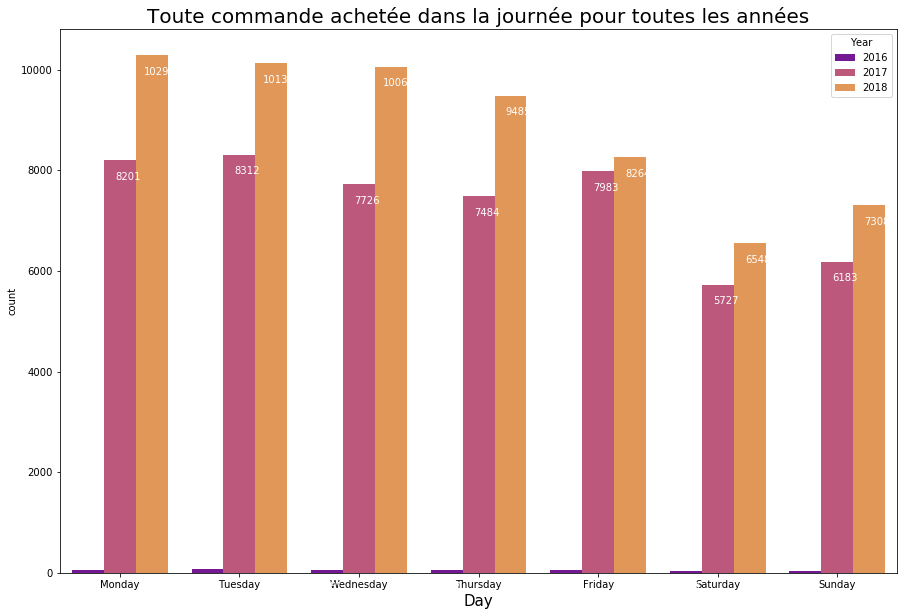

In [160]:
df['Day'] = df['order_purchase_timestamp'].dt.day_name()
ax= plt.figure(figsize=(15,10))

ax= sns.countplot(data=df,x='Day',order=list(calendar.day_name), hue='Year',palette="plasma");
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)

plt.title('Toute commande achetée dans la journée pour toutes les années', fontsize=20);
plt.xlabel('Day',fontsize=15);

- Nous pouvons voir plus d'achats en ligne se dérouler en semaine et moins le week-end.

# Top 20 produits :

In [34]:
Top_20_product=df["product_category_name_english"].value_counts()
Top_20_product.head(20)

bed_bath_table              11815
health_beauty               9816 
sports_leisure              8790 
furniture_decor             8640 
computers_accessories       7963 
housewares                  7196 
watches_gifts               6075 
telephony                   4605 
garden_tools                4479 
auto                        4301 
toys                        4193 
cool_stuff                  3915 
perfumery                   3508 
baby                        3119 
electronics                 2809 
stationery                  2572 
fashion_bags_accessories    2125 
pet_shop                    2007 
office_furniture            1763 
luggage_accessories         1148 
Name: product_category_name_english, dtype: int64

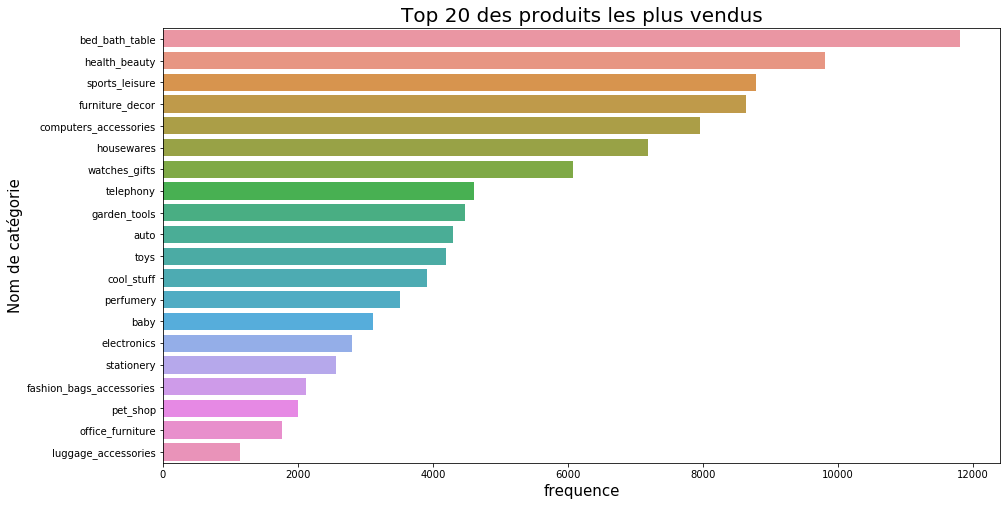

In [35]:
fig=plt.figure(figsize=(15,8))
#sns.set_style("darkgrid")
sns.barplot(y=Top_20_product.head(20).index, x=Top_20_product.head(20).values)
plt.title('Top 20 des produits les plus vendus',fontsize=20);
plt.xlabel('frequence',fontsize=15);
plt.ylabel('Nom de catégorie',fontsize=15);

In [36]:
top_category = df[df['product_category_name_english'].isin(Top_20_product.head(10).index)]

price_top_category=round(top_category.groupby("product_category_name_english")["price"].agg(np.mean).sort_values(ascending=False), 2)
print(price_top_category)

product_category_name_english
watches_gifts            199.89
auto                     140.47
health_beauty            129.97
computers_accessories    116.35
sports_leisure           113.29
garden_tools             110.18
bed_bath_table           92.47 
housewares               90.38 
furniture_decor          87.16 
telephony                70.70 
Name: price, dtype: float64


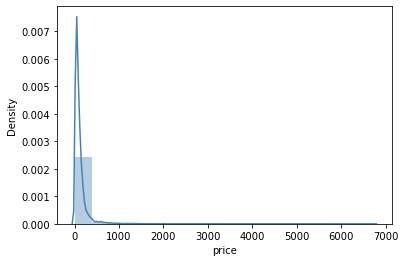

In [37]:
# Distribution des valeurs de prix
sns.distplot(df['price'],bins=int(1 + np.log2(len(df['price']))), color='steelblue')

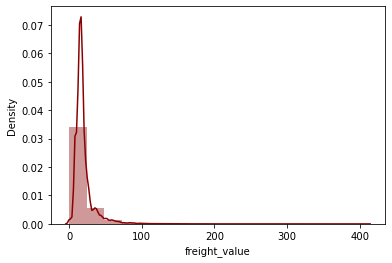

In [39]:
# Distribution des valeurs de frais de transport
sns.distplot(df['freight_value'],bins=int(1 + np.log2(len(df['freight_value']))), color='darkred')

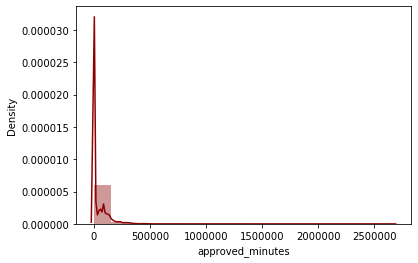

In [41]:
# Distribution des Délai d'approbation en minutes
sns.distplot(df['approved_minutes'],bins=int(1 + np.log2(len(df['approved_minutes']))), color='darkred')

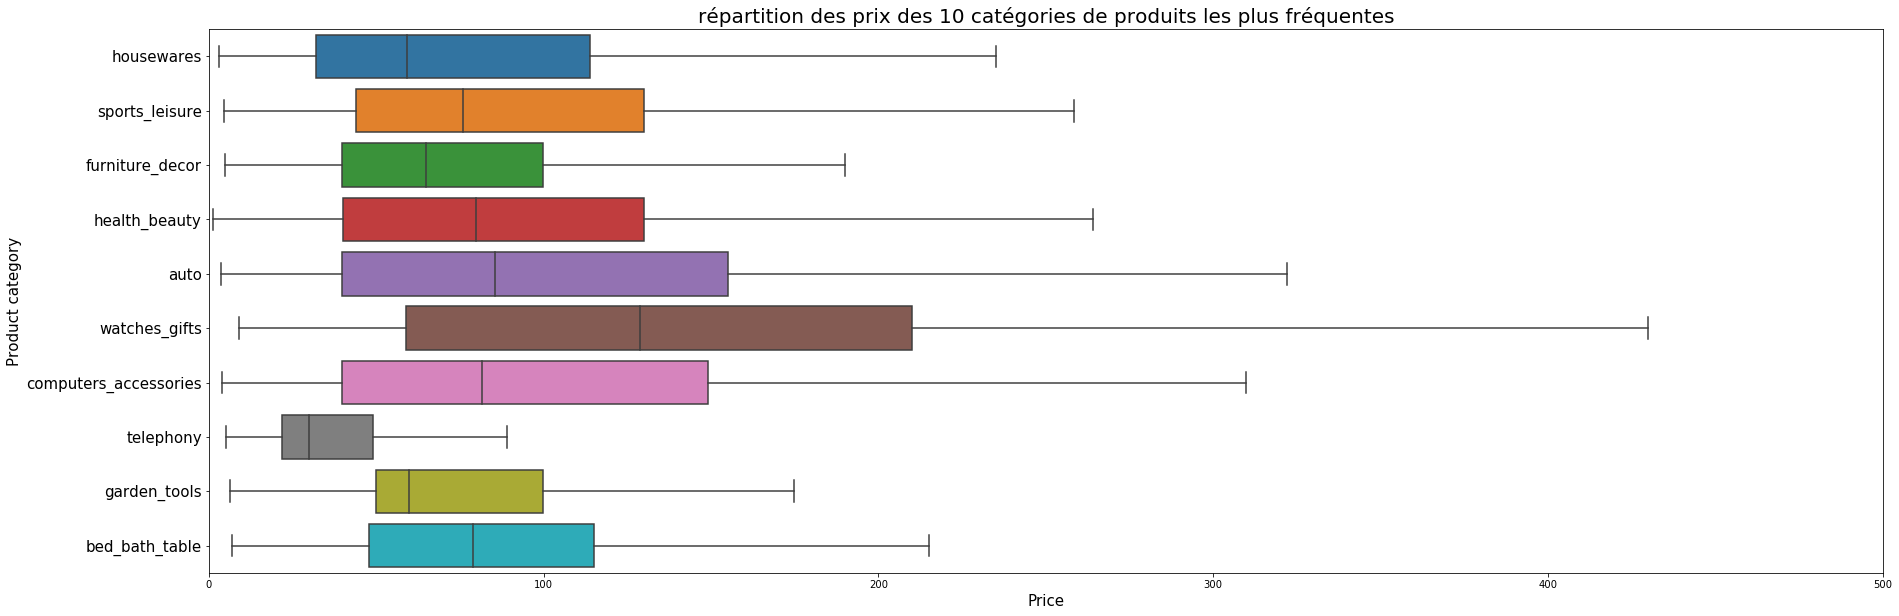

In [164]:
fig=plt.figure(figsize=(30,10))

sns.boxplot(data=top_category,x='price',y='product_category_name_english',
           showfliers=False);
plt.xlim(0,500);
plt.title('répartition des prix des 10 catégories de produits les plus fréquentes',fontsize=20)


plt.ylabel('Product category',fontsize=15)
plt.xlabel('Price',fontsize=15);
plt.yticks(fontsize=15);

# Customer_city:

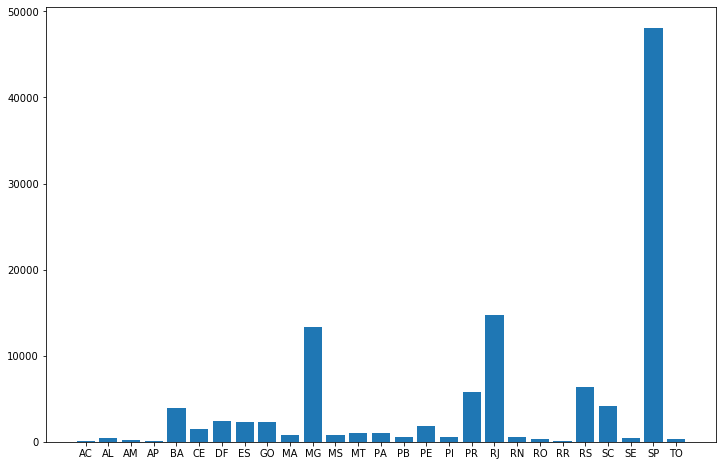

In [165]:
df_state=pd.DataFrame(df.groupby('customer_state')['customer_id'].count()).reset_index()

plt.figure(figsize=(12,8))
plt.bar(df_state['customer_state'],df_state['customer_id'])
plt.show()

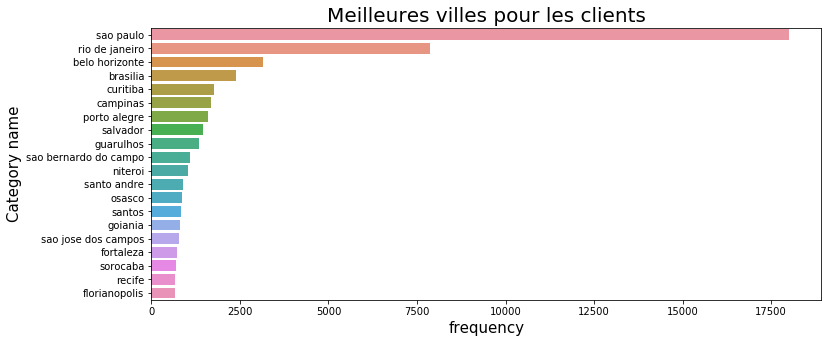

In [166]:
#top_20_city_shopping = df['order_item_id'].groupby(df['customer_city']).sum().sort_values(ascending=False)[:20]

#fig=plt.figure(figsize=(16,9))
#sns.barplot(y=top_20_city_shopping.index,x=top_20_city_shopping.values)
#plt.title('Top 20 Most City Shopping',fontsize=20)
#plt.xlabel('Total Product',fontsize=17)
#plt.ylabel('City',fontsize=17)


popular_cities_customer = df['customer_city'].value_counts()

fig=plt.figure(figsize=(12,5))
#sns.set_style("darkgrid")
sns.barplot(y=popular_cities_customer.head(20).index, x=popular_cities_customer.head(20).values)
plt.title('Meilleures villes pour les clients',fontsize=20);
plt.xlabel('frequency',fontsize=15);
plt.ylabel('Category name',fontsize=15);


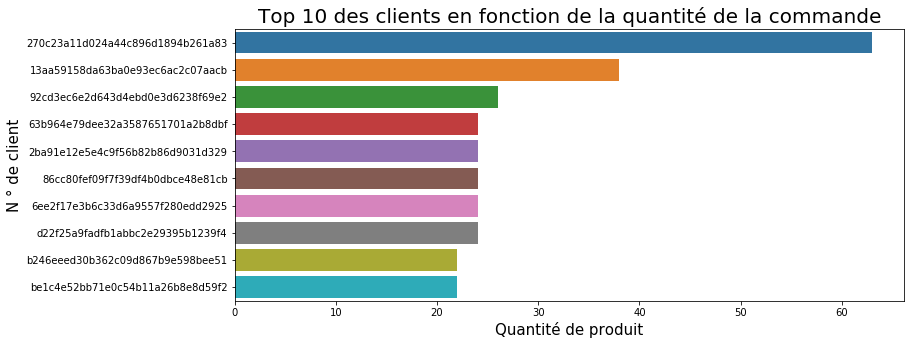

In [167]:
Top_10_customer_shopping= df['customer_id'].value_counts()

fig=plt.figure(figsize=(12,5))
#sns.set_style("darkgrid")
sns.barplot(y=Top_10_customer_shopping.head(10).index, x=Top_10_customer_shopping.head(10).values)
plt.title('Top 10 des clients en fonction de la quantité de la commande',fontsize=20);
plt.xlabel('Quantité de produit',fontsize=15);
plt.ylabel('N ° de client',fontsize=15);

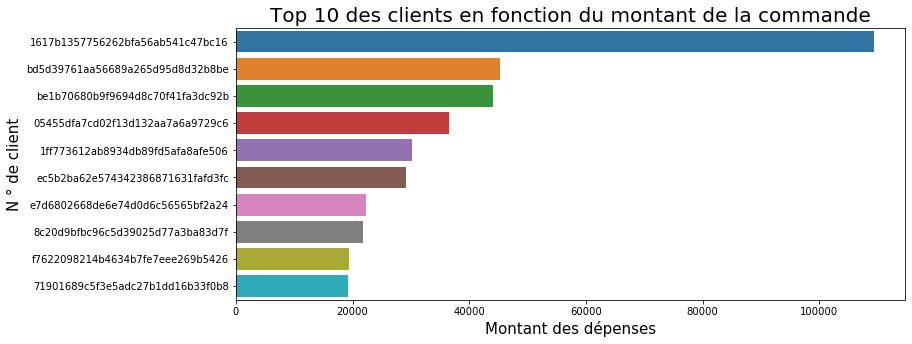

In [168]:
Top_10_customer_shopp= df['payment_value'].groupby(df['customer_id']).sum().sort_values(ascending=False)[:10]

#print(Top_10_customer_shopp)

fig=plt.figure(figsize=(12,5))
#sns.set_style("darkgrid")
sns.barplot(y=Top_10_customer_shopp.index, x=Top_10_customer_shopp.values)
plt.title('Top 10 des clients en fonction du montant de la commande',fontsize=20);
plt.xlabel('Montant des dépenses',fontsize=15);
plt.ylabel('N ° de client',fontsize=15);

# Payment: 

- Les différents types de paiment 

In [169]:
df.payment_type.unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

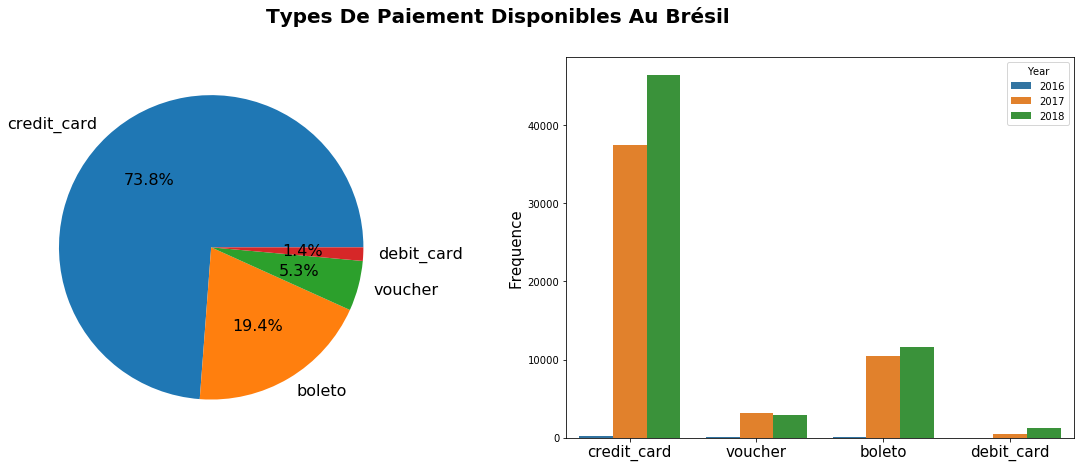

In [170]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,7))
plt.suptitle('Types de paiement disponibles au Brésil'.title() , fontsize=20,fontweight='bold');

df["payment_type"].value_counts().plot(ax=ax1,
    kind="pie",
    autopct="%1.1f%%",
    fontsize=16)
ax1.axis('off');

sns.countplot(data=df,x='payment_type',hue='Year',ax=ax2);
plt.xlabel('');
plt.xticks(fontsize=15);
plt.ylabel('Frequence',fontsize=15);

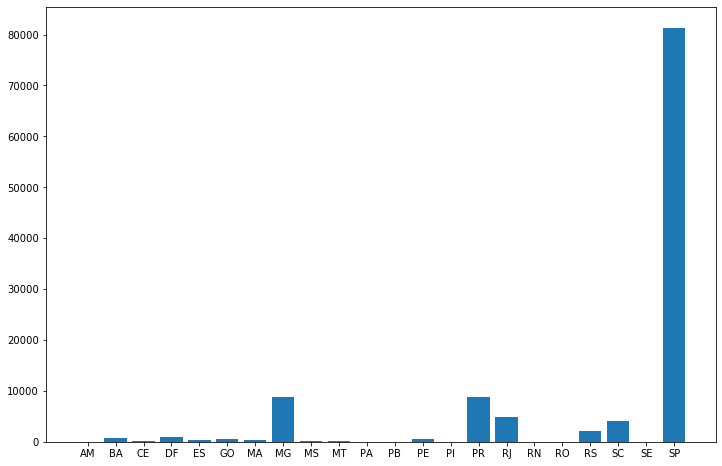

In [171]:
df_state=pd.DataFrame(df.groupby('seller_state')['order_id'].count()).reset_index()
plt.figure(figsize=(12,8))
plt.bar(df_state['seller_state'],df_state['order_id'])
plt.show()

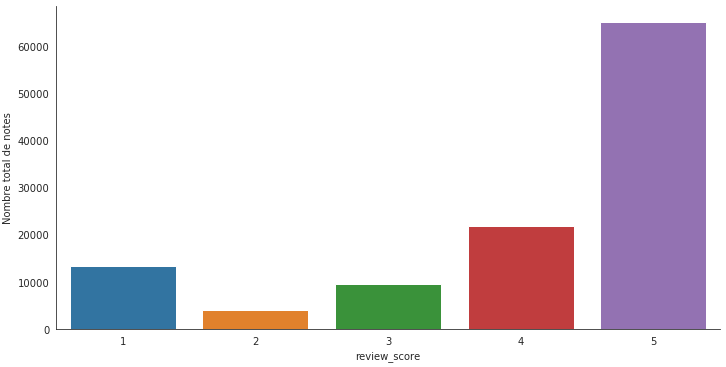

In [43]:
electronics_data = df[['customer_id','product_id','review_score']]

# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.catplot("review_score", data=electronics_data, aspect=2.0,kind='count')
    g.set_ylabels("Nombre total de notes")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114050 entries, 0 to 116580
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       114050 non-null  object         
 1   customer_id                    114050 non-null  object         
 2   order_status                   114050 non-null  object         
 3   order_purchase_timestamp       114050 non-null  datetime64[ns] 
 4   order_approved_at              114050 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   114050 non-null  object         
 6   order_delivered_customer_date  114050 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  114050 non-null  datetime64[ns] 
 8   payment_sequential             114050 non-null  int64          
 9   payment_type                   114050 non-null  object         
 10  payment_installments           114050 non-null  int64   

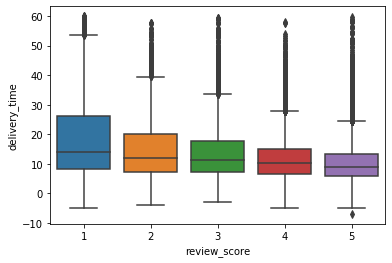

In [54]:
# Boxplot du temps de livraison pour chaque note
sns.boxplot(x="review_score", y="delivery_time",
            data=df[df["delivery_time"] < 60])
plt.show()

- Les notes d'achat sont meilleurs avec un court temps de livraison.

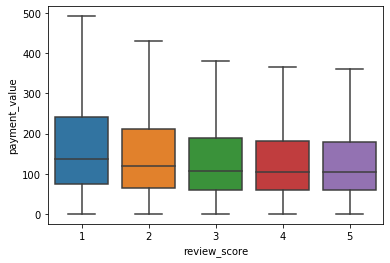

In [56]:
# Boxplot du payement effectué pour chaque note
sns.boxplot(x="review_score", y="payment_value", data=df, showfliers=False)
plt.show()

- Les notes d'achat sont relativement meilleurs avec des produits moins chers.

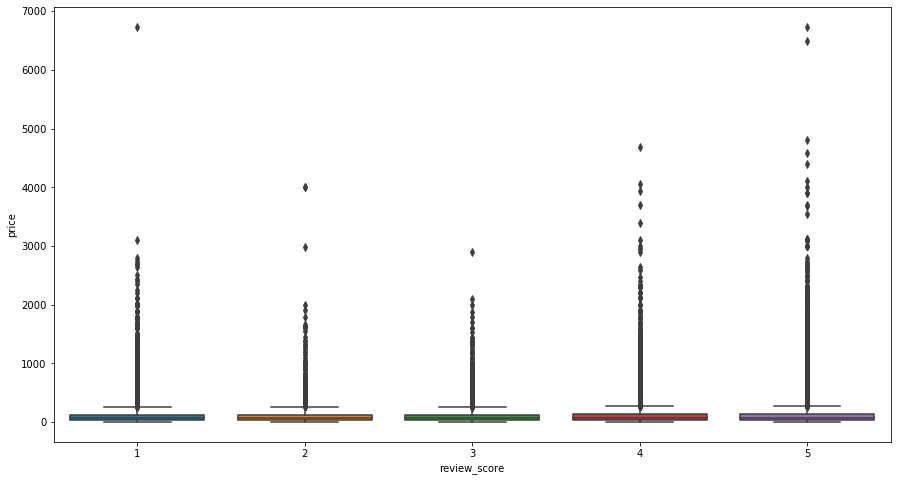

In [173]:
var= 'review_score'
data= pd.concat([df['price'],df[var]], axis=1)
f,ax= plt.subplots(figsize=(15,8))
fig=sns.boxplot(x=var, y="price", data=data)
#fig.axis=(ymin=0, ymax=50)

# Quels vendeurs vendent le plus?

Text(0, 0.5, 'N° Vendeur')

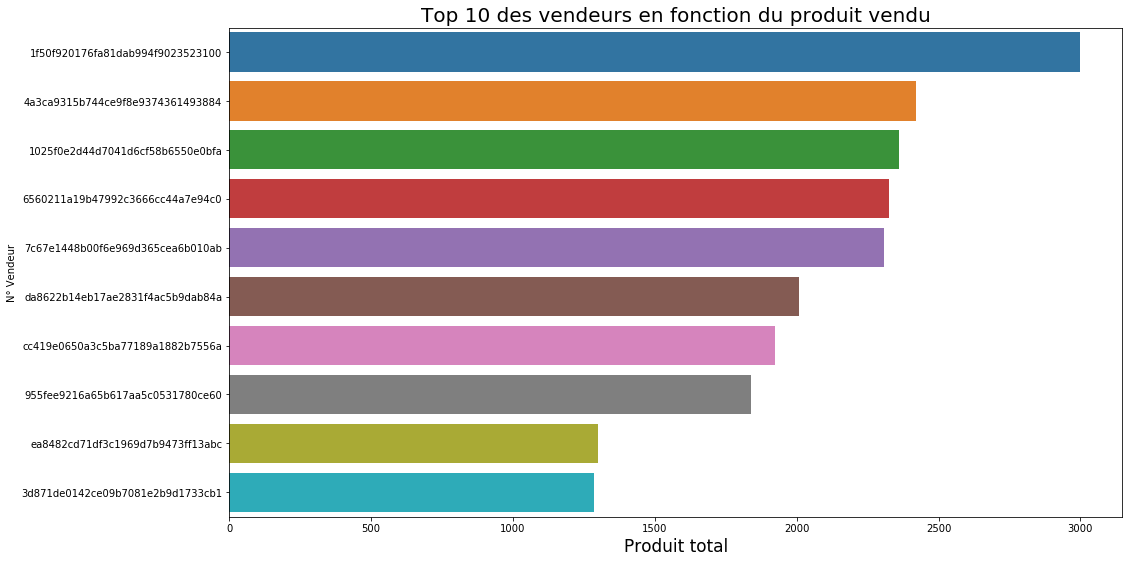

In [174]:
Top_10_seller_order= df['order_item_id'].groupby(df['seller_id']).sum().sort_values(ascending=False)[:10]


fig=plt.figure(figsize=(16, 9))
sns.barplot(y=Top_10_seller_order.index, x=Top_10_seller_order.values)
plt.title("Top 10 des vendeurs en fonction du produit vendu", fontsize=20)
plt.xlabel('Produit total', fontsize=17)
plt.ylabel("N° Vendeur")


Text(0, 0.5, 'N° Vendeur')

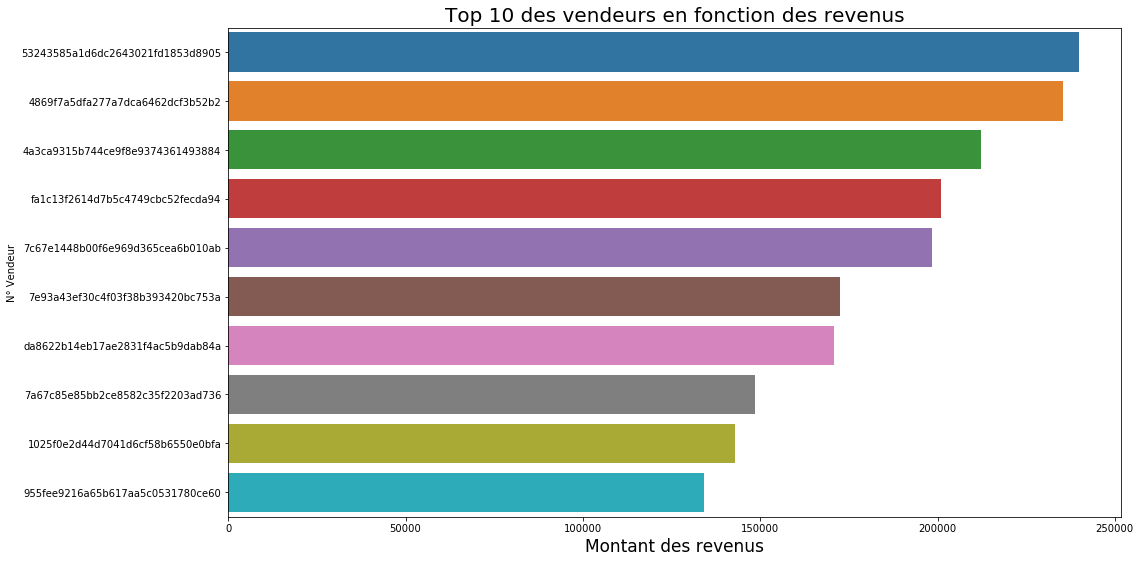

In [175]:
Top_10_seller_order= df['price'].groupby(df['seller_id']).sum().sort_values(ascending=False)[:10]


fig=plt.figure(figsize=(16, 9))
sns.barplot(y=Top_10_seller_order.index, x=Top_10_seller_order.values)
plt.title("Top 10 des vendeurs en fonction des revenus", fontsize=20)
plt.xlabel('Montant des revenus', fontsize=17)
plt.ylabel("N° Vendeur")

Text(0, 0.5, 'N° Vendeur')

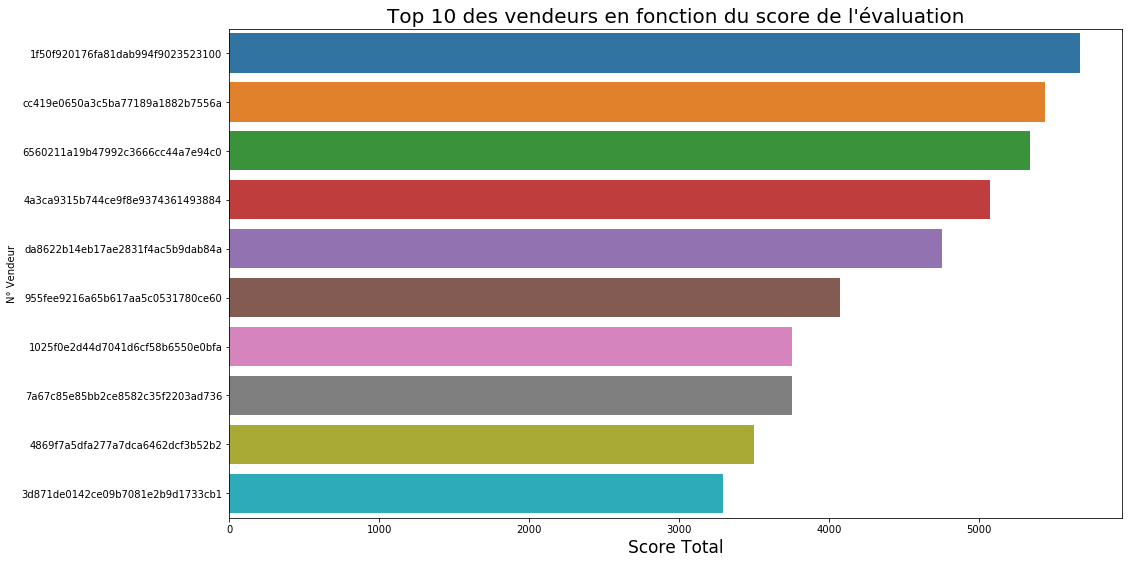

In [176]:
Top_10_seller_order= df[df['review_score']==5].groupby(df['seller_id']).sum().sort_values(by= ['review_score'],ascending=False)[:10]


fig=plt.figure(figsize=(16, 9))
sns.barplot(y=Top_10_seller_order.index, x=Top_10_seller_order.review_score)
plt.title("Top 10 des vendeurs en fonction du score de l'évaluation", fontsize=20)
plt.xlabel('Score Total', fontsize=17)
plt.ylabel("N° Vendeur")

## Nombre de produits que les gens commandent habituellement

In [177]:
usual_order= df.groupby('order_id')['order_item_id'].aggregate('sum').reset_index()
usual_order= usual_order['order_item_id'].value_counts()
usual_order.head()

1     82599
3      7272
2      2506
6      1500
10      477
Name: order_item_id, dtype: int64

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '24'),
 Text(0, 0, '26'),
 Text(0, 0, '28'),
 Text(0, 0, '30'),
 Text(0, 0, '36'),
 Text(0, 0, '40'),
 Text(0, 0, '41'),
 Text(0, 0, '42'),
 Text(0, 0, '45'),
 Text(0, 0, '55'),
 Text(0, 0, '57'),
 Text(0, 0, '66'),
 Text(0, 0, '78'),
 Text(0, 0, '84'),
 Text(0, 0, '91'),
 Text(0, 0, '105'),
 Text(0, 0, '120'),
 Text(0, 0, '126'),
 Text(0, 0, '132'),
 Text(0, 0, '210'),
 Text(0, 0, '231')]

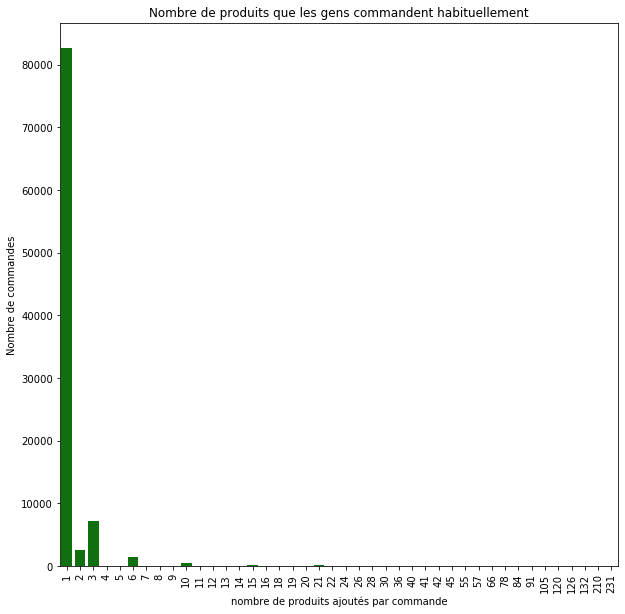

In [178]:
plt.figure(figsize=(10, 10))
ax= sns.barplot(x=usual_order.index, y=usual_order.values, color="green")
ax.set_xlabel("nombre de produits ajoutés par commande")
ax.set_ylabel("Nombre de commandes")
ax.set_title("Nombre de produits que les gens commandent habituellement")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [179]:
#%history
nbr_commandes = pd.DataFrame(df.groupby(["customer_unique_id"])["order_id"].nunique())
nbr_commandes.rename(columns={"index": "customer_unique_id", "order_id": "nbr_commandes"}, inplace=True)  

#On joint les 2 dataframes
df = pd.merge(df, nbr_commandes, on=["customer_unique_id"], how="inner")

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,approved_delay,delivery_gap_btw_est_act,review_answer_time,product_volume,approved_minutes,Year,Month,Day,nbr_commandes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,0 days 00:10:42,7 days 02:34:47,1 days 03:43:48,1976.0,642.0,2017,October,Monday,2
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,0 days 00:10:42,7 days 02:34:47,1 days 03:43:48,1976.0,642.0,2017,October,Monday,2
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,0 days 00:10:42,7 days 02:34:47,1 days 03:43:48,1976.0,642.0,2017,October,Monday,2
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,1,credit_card,1,44.11,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,493e9a0b23de35d37871a6e8940f822a,5,2017-09-06,2017-09-07 00:44:35,7025,guarulhos,SP,bebes,35.0,2395.0,1.0,350.0,19.0,14.0,12.0,baby,0 days 00:16:47,9 days 04:39:40,1 days 00:44:35,3192.0,1007.0,2017,September,Monday,2
4,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,b46f1e34512b0f4c74a72398b03ca788,4,2017-08-19,2017-08-20 15:16:36,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,0 days 01:35:45,9 days 09:15:17,1 days 15:16:36,1976.0,5745.0,2017,August,Tuesday,1


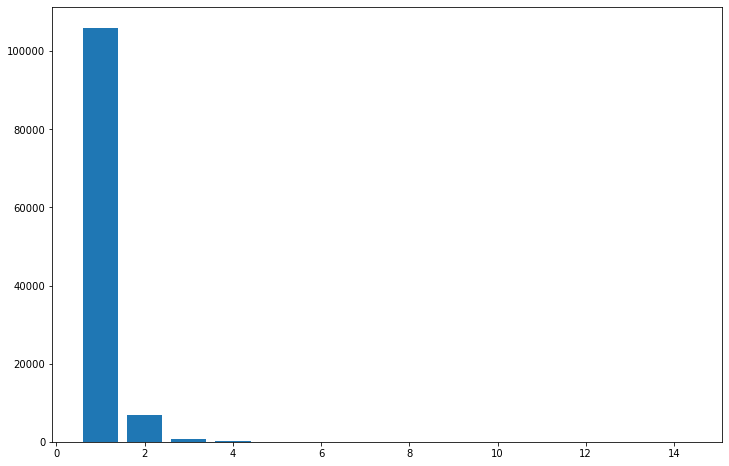

In [180]:
df_st=pd.DataFrame(df.groupby('nbr_commandes')['order_id'].count()).reset_index()
plt.figure(figsize=(12,8))
plt.bar(df_st['nbr_commandes'],df_st['order_id'])
plt.show()

# Corrélation linéaire variables quantitatives

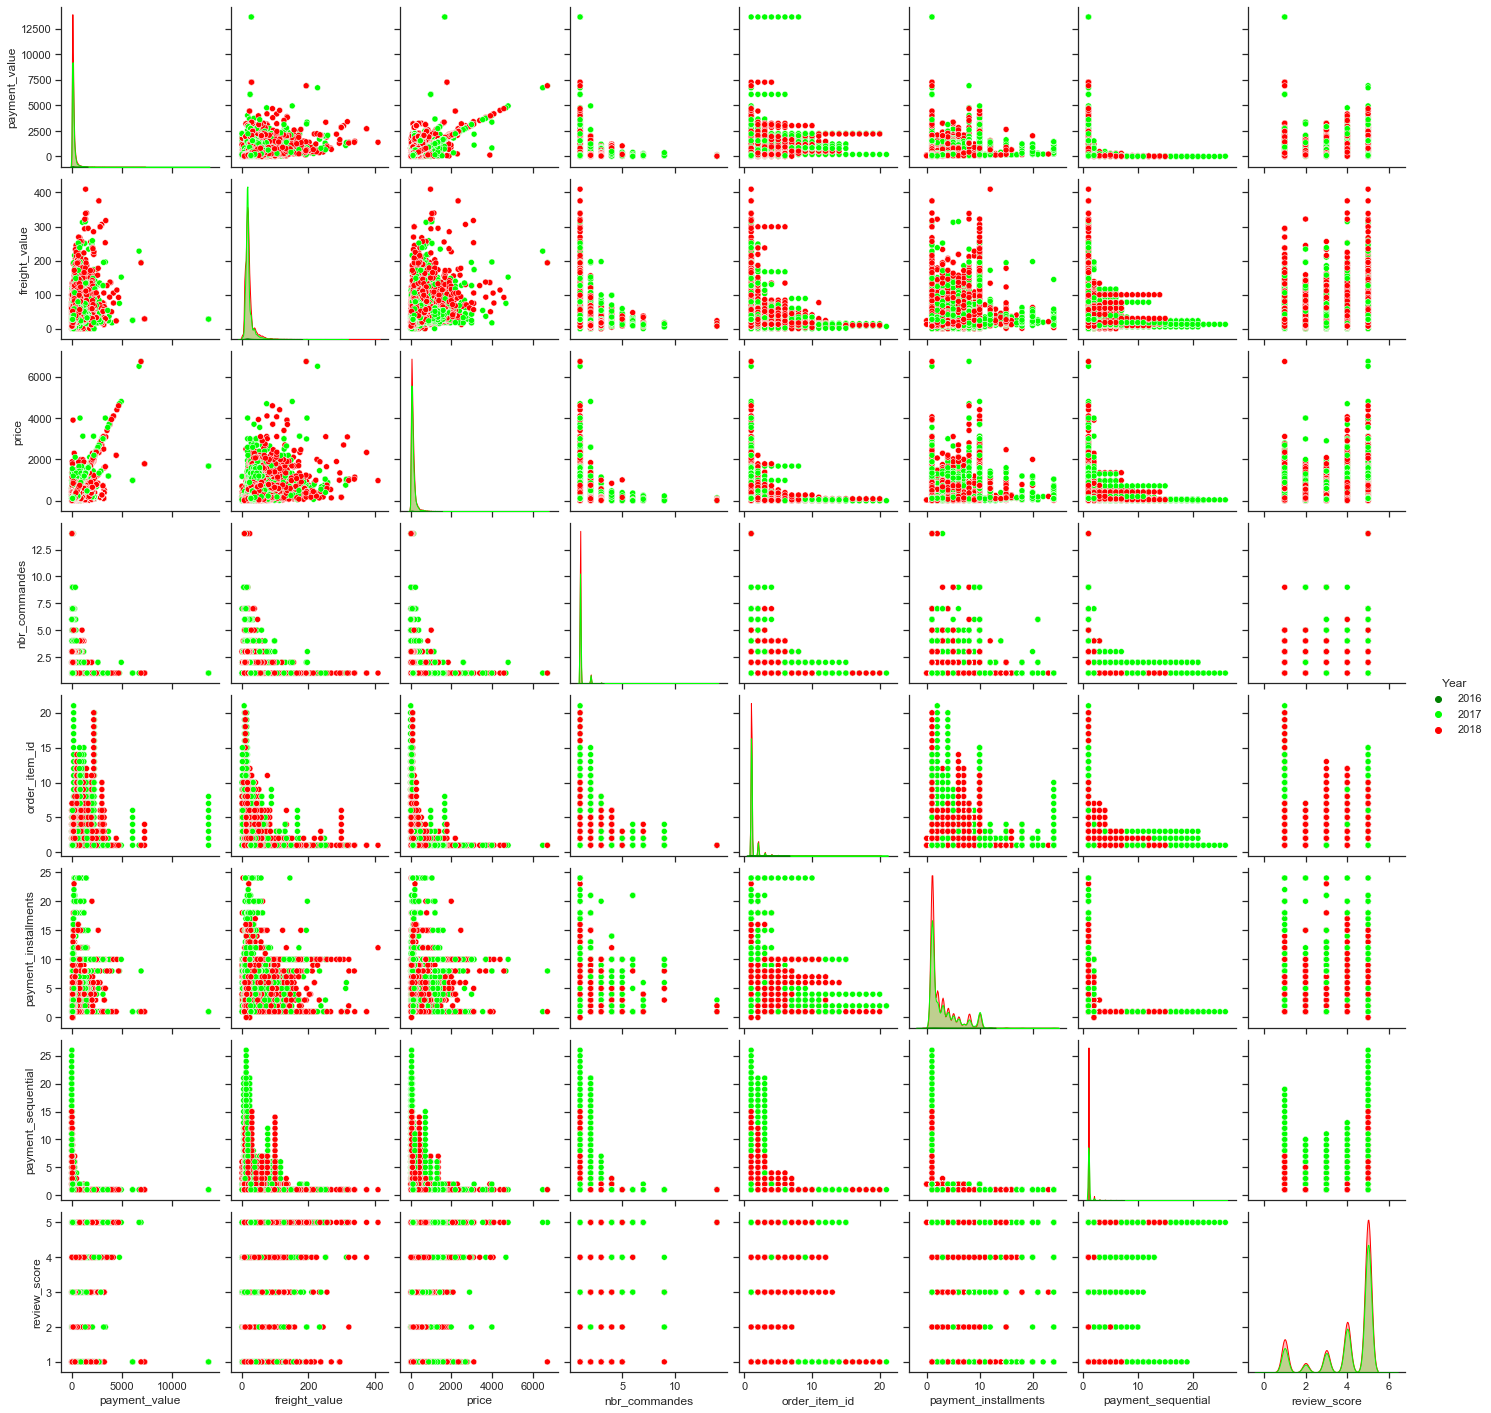

In [182]:
# Corrélation linéaire variables quantitatives
sns.set(style="ticks", color_codes=True)
features=['payment_value', 'freight_value','price', 'nbr_commandes',
          'order_item_id', 'payment_installments','payment_sequential', 'review_score']
def pai_plot(features, data):
    g= sns.pairplot(data, vars=features,  hue='Year', palette={2016:"green", 2017:"lime", 2018:"red"} )
pai_plot(features, data=df)   

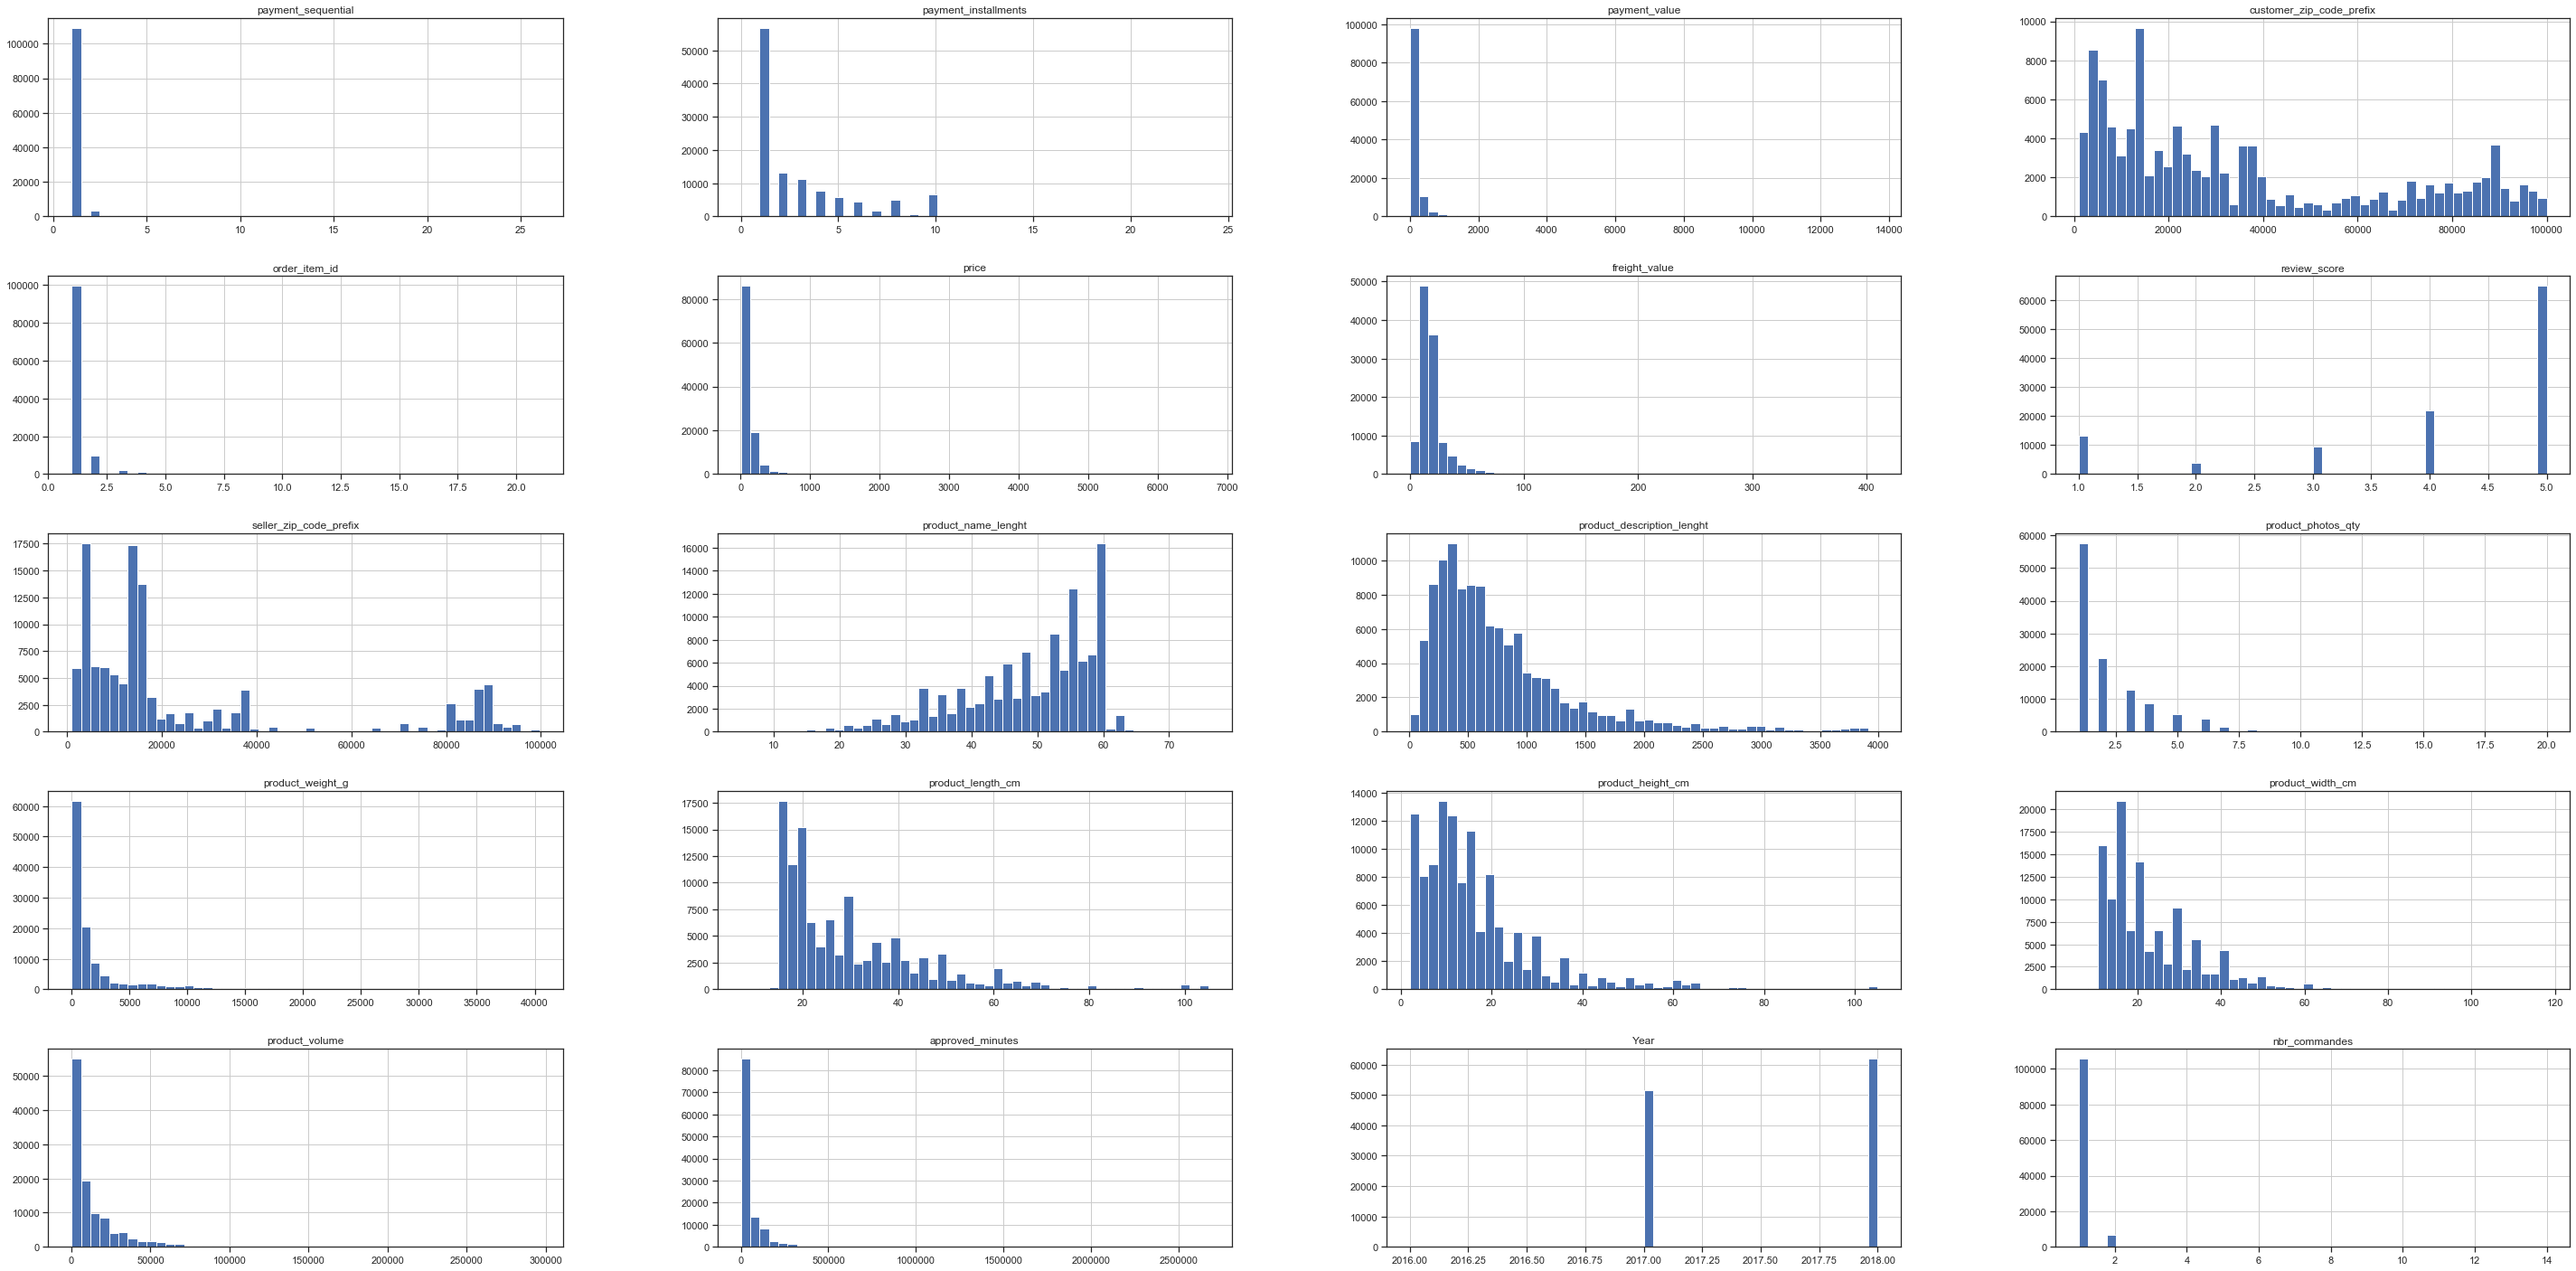

In [183]:
df.hist(bins=50,figsize=(50,25))
plt.show()

# Matrice de corrélation:

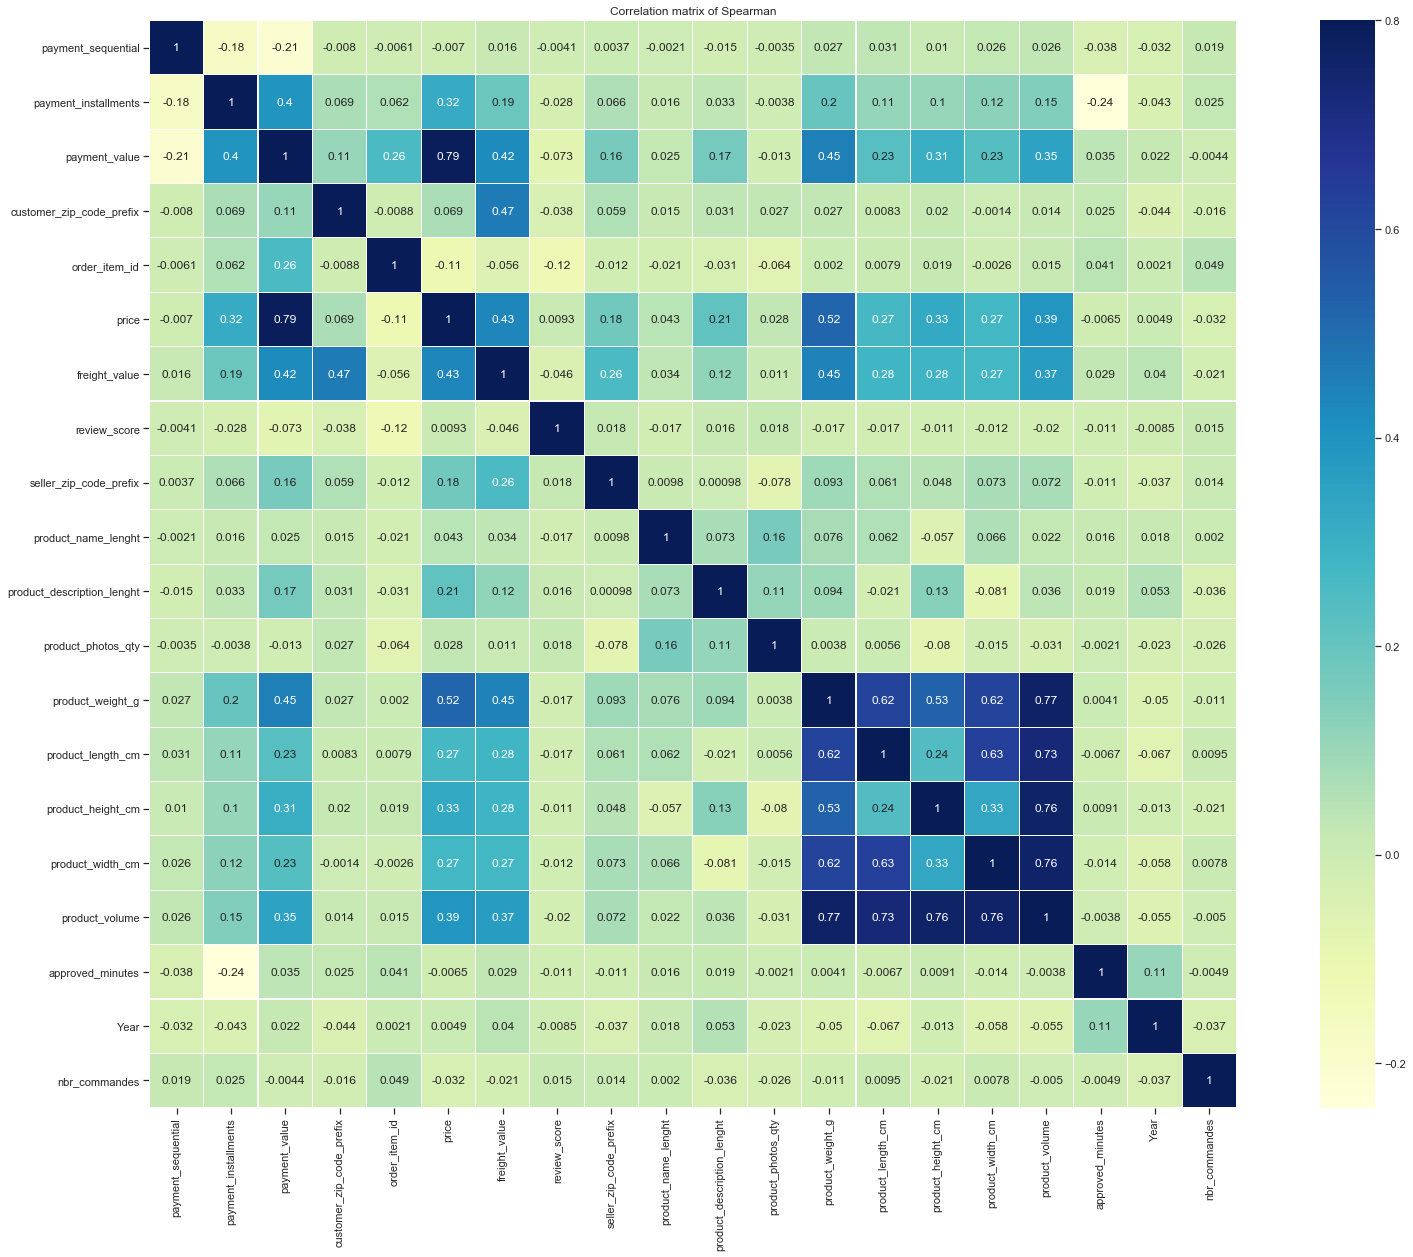

In [184]:
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1, vmax=.8, square=True, annot=True)
plt.title('Correlation matrix of Spearman')
plt.show()

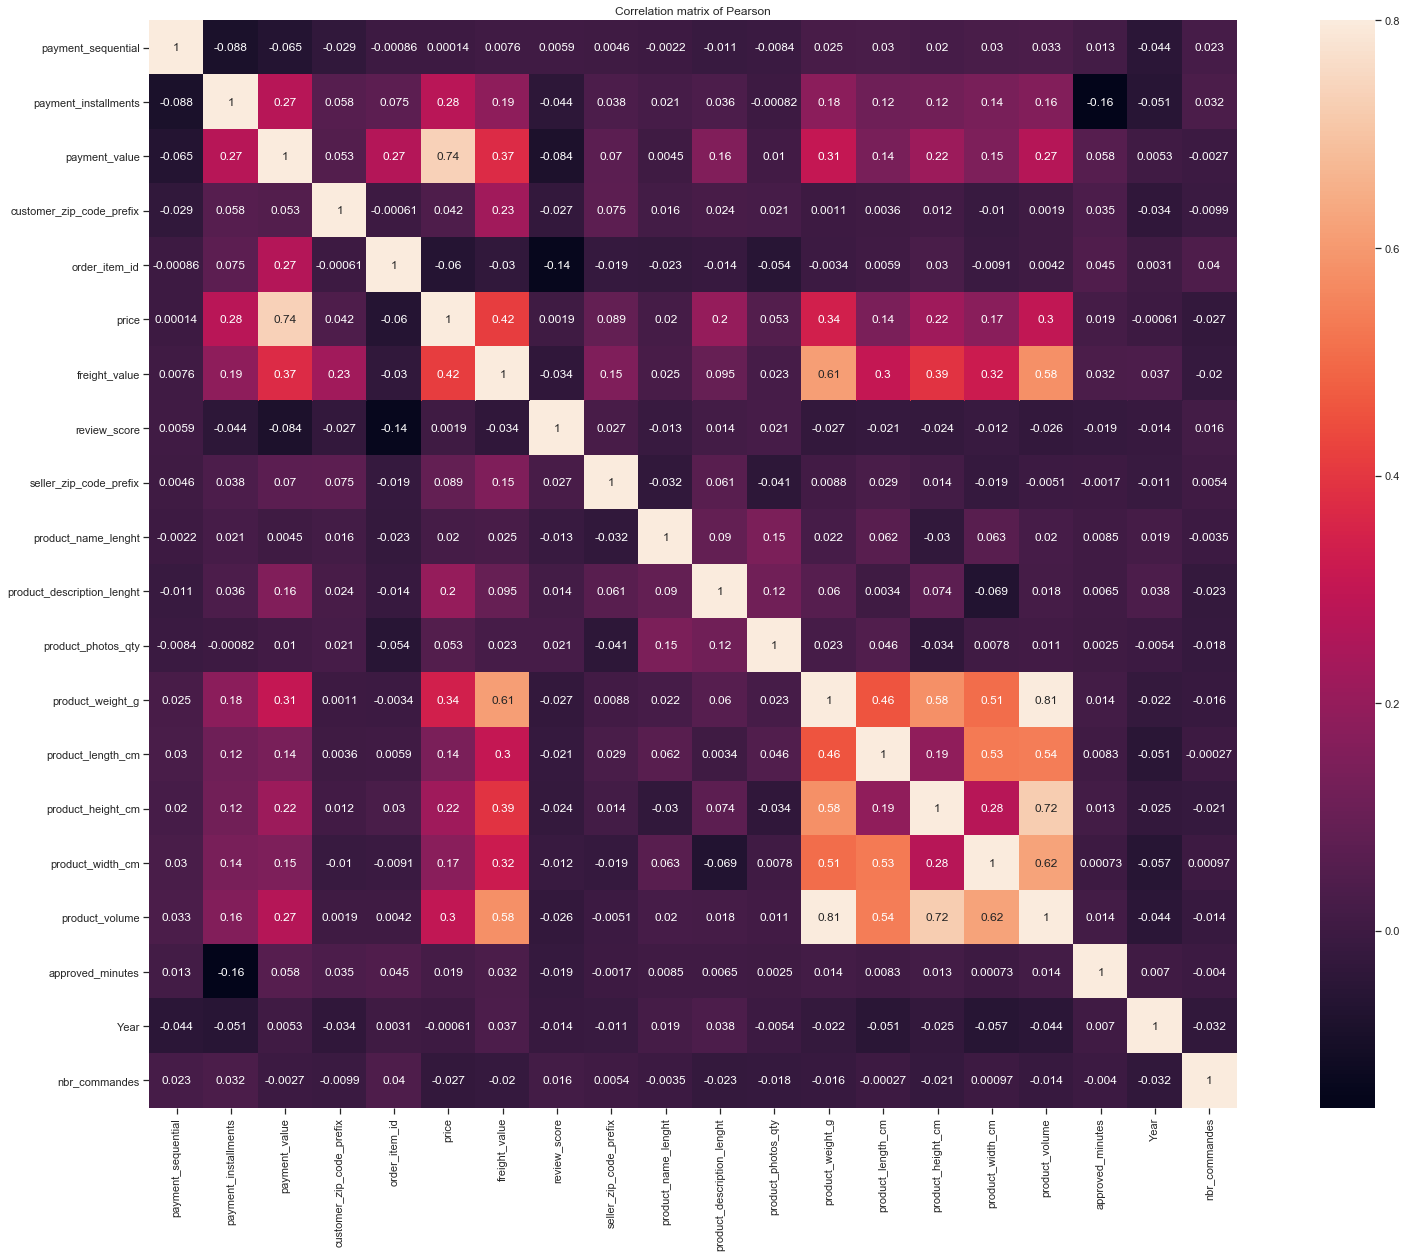

In [185]:
# correlation matrix 
corrmat=df.corr()
f, ax=plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.title('Correlation matrix of Pearson')
plt.show()

In [58]:
df.to_csv("Data_merged.csv",  date_format='%Y-%m-%d %H:%M:%S')